In [2]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('C:\\Users\\mohana.kothuri\\Downloads\\movie_metadata.csv')

In [3]:
#q1 for movie_metadata dataset
def imdb(df):
    df1=df.groupby(['title_year','color','genres'],sort="TRUE")['imdb_score'].agg([min,max,'mean'])
    df2=df.groupby(['title_year','color','genres'],sort="TRUE")['duration'].sum().rename(columns=['total_run_time_mins '])
    df1['total_run_time_mins']=df2[3]
    return df1

imdb(df).head()

min  max  mean  \
title_year color            genres                                
1916.0      Black and White Drama|History|War    8.0  8.0   8.0   
1920.0      Black and White Crime|Drama          4.8  4.8   4.8   
1925.0      Black and White Drama|Romance|War    8.3  8.3   8.3   
1927.0      Black and White Drama|Sci-Fi         8.3  8.3   8.3   
1929.0      Black and White Crime|Drama|Romance  8.0  8.0   8.0   

                                                 total_run_time_mins  
title_year color            genres                                    
1916.0      Black and White Drama|History|War                  145.0  
1920.0      Black and White Crime|Drama                        145.0  
1925.0      Black and White Drama|Romance|War                  145.0  
1927.0      Black and White Drama|Sci-Fi                       145.0  
1929.0      Black and White Crime|Drama|Romance                145.0

In [4]:
#q2 for movie_metadata
def quan(df,num):
    df['title_length']=df['movie_title'].apply(len)
    df["percentile"]=pd.qcut(df["title_length"],num,labels=False)
    df2=df.pivot_table(index="title_year",columns=['percentile'],values=["title_length"],aggfunc={"title_length":'count'},fill_value=0)
    df2[["min","max"]]=df.groupby("title_year").agg({"title_length":[min,max]})
    return df2

quan(df,4).head()

title_length          min max
percentile            0  1  2  3        
title_year                              
1916.0                0  0  0  1  49  49
1920.0                0  0  0  1  31  31
1925.0                0  1  0  0  15  15
1927.0                1  0  0  0  11  11
1929.0                0  1  1  0  14  20

In [5]:
#q3
import sys
df1=pd.read_csv('C:\\Users\\mohana.kothuri\\Downloads\\diamonds.csv')
def cross(df1):
    df1['z'].fillna(0,inplace=True)
    for i in range(len(df1)):
        if df1['z'][i]=="None":
            df1['z'][i]=0
    df1['z']=df1['z'].astype(float)
    df1['volume']=8
    df1.loc[df1['depth'] > 60, 'volume'] = (df1['x']*df1['y']*df1['z'])#for calculating volume
    return pd.crosstab(pd.qcut(df1["volume"], 5),df1["cut"],normalize=True)

cross(df1)

c:\users\mohana.kothuri\tigerml\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


cut                     Fair      Good     Ideal   Premium  Very Good
volume                                                               
(-0.001, 51.208]    0.005246  0.024841  0.051537  0.062234   0.056153
(51.208, 73.566]    0.000871  0.011142  0.113919  0.043714   0.030329
(73.566, 119.215]   0.006192  0.016166  0.097030  0.036094   0.044566
(119.215, 176.055]  0.010511  0.024879  0.063309  0.049275   0.051982
(176.055, 838.502]  0.007026  0.013941  0.073727  0.064365   0.040951

In [7]:
df2=pd.read_csv('C:\\Users\\mohana.kothuri\\Downloads\\imdb.csv',escapechar="\\")
def top(df2):
    df2=df2.dropna()
    df3=df2.groupby('year').agg({'title':list,'imdbRating':list})
    df3=df3.sort_values('year')
    df3['top_10_ratings']=df3['imdbRating'].apply(lambda i:sorted(i)[-((len(i)//10) if len(i)>10 else 1):])

    df3['number of movies']=df3['top_10_ratings'].apply(len)
    df3['top_10_mean imdbRating']=df3['top_10_ratings'].apply(np.mean)
    return df3

top(df2).head()

title imdbRating top_10_ratings  \
year                                                                         
1888.0    [Traffic Crossing Leeds Bridge (1888)]      [7.2]          [7.2]   
1893.0                 [Blacksmith Scene (1893)]      [6.3]          [6.3]   
1894.0  [Dickson Experimental Sound Film (1894)]      [6.8]          [6.8]   
1899.0           [The Kiss in the Tunnel (1899)]      [5.9]          [5.9]   
1900.0                 [Le duel d'Hamlet (1900)]      [5.8]          [5.8]   

        number of movies  top_10_mean imdbRating  
year                                              
1888.0                 1                     7.2  
1893.0                 1                     6.3  
1894.0                 1                     6.8  
1899.0                 1                     5.9  
1900.0                 1                     5.8

In [16]:
def ques4(df,df2):
    import math  
    df['url']=df['movie_imdb_link'].apply(lambda x:x.split('?')[0])
    k=pd.DataFrame()
    hh=df['title_year'].unique()
    for x in hh:
        ll1=df[(df['title_year']==x)]
        lr=ll1.sort_values(by=['gross'], ascending=False)
        g=lr.head(math.ceil(len(ll1)*0.10))
        k=k.append(g)
    q=pd.merge(k,df2,on="url",how="left")
    genres=q.loc[:,'Action':'Western'].columns.tolist()
    m=pd.DataFrame()
    m=q.groupby("title_year")[genres].sum()
    m['Avg_imdb']=q.groupby("title_year")["imdb_score"].mean()
    m['count_imdb']=q.groupby("title_year")["imdb_score"].count()
    return m

df=pd.read_csv("movie_metadata.csv",escapechar="\\")
ques4(df,df2)

Action  Adult  Adventure  Animation  Biography  Comedy  Crime  \
title_year                                                                  
1916.0         0.0    0.0        0.0        0.0        0.0     0.0    0.0   
1920.0         0.0    0.0        0.0        0.0        0.0     0.0    0.0   
1925.0         0.0    0.0        0.0        0.0        0.0     0.0    0.0   
1927.0         0.0    0.0        0.0        0.0        0.0     0.0    0.0   
1929.0         0.0    0.0        0.0        0.0        0.0     0.0    0.0   
...            ...    ...        ...        ...        ...     ...    ...   
2012.0         9.0    0.0       13.0        4.0        1.0     7.0    3.0   
2013.0         8.0    0.0       13.0        3.0        1.0     7.0    4.0   
2014.0         6.0    0.0        8.0        2.0        0.0     3.0    0.0   
2015.0         0.0    0.0        3.0        0.0        0.0     0.0    0.0   
2016.0         1.0    0.0        0.0        0.0        0.0     0.0    0.0   

            Documentary  Drama  Family  ...  Romance  SciFi  Short  Sport  \
title_year                              ...                                 
1916.0              0.0    1.0     0.0  ...      0.0    0.0    0.0    0.0   
1920.0              0.0    0.0     0.0  ...      0.0    0.0    0.0    0.0   
1925.0              0.0    1.0     0.0  ...      1.0    0.0    0.0    0.0   
1927.0              0.0    1.0     0.0  ...      0.0    1.0    0.0    0.0   
1929.0              0.0    0.0     0.0  ...      1.0    0.0    0.0    0.0   
...                 ...    ...     ...  ...      ...    ...    ...    ...   
2012.0              0.0    6.0     0.0  ...      1.0    2.0    0.0    0.0   
2013.0              0.0    5.0     2.0  ...      2.0    3.0    0.0    0.0   
2014.0              0.0    1.0     0.0  ...      0.0    4.0    0.0    0.0   
2015.0              0.0    2.0     2.0  ...      0.0    1.0    0.0    0.0   
2016.0              0.0    0.0     0.0  ...      0.0    1.0    0.0    0.0   

            TalkShow  Thriller  War  Western  Avg_imdb  count_imdb  
title_year                                                          
1916.0           0.0       0.0  0.0      0.0  8.000000           1  
1920.0           0.0       0.0  0.0      0.0  4.800000           1  
1925.0           0.0       0.0  1.0      0.0  8.300000           1  
1927.0           0.0       0.0  0.0      0.0  8.300000           1  
1929.0           0.0       0.0  0.0      0.0  6.300000           1  
...              ...       ...  ...      ...       ...         ...  
2012.0           0.0       4.0  0.0      1.0  7.217391          23  
2013.0           0.0       3.0  0.0      0.0  7.104167          24  
2014.0           0.0       1.0  0.0      0.0  7.103846          26  
2015.0           0.0       1.0  0.0      0.0  6.969565          23  
2016.0           0.0       0.0  0.0      0.0  7.372727          11  

[91 rows x 30 columns]

In [8]:
#q5
def summ(df2):
    df2=df2.dropna()
    df2["decile"]=pd.qcut(df2["duration"],10,labels=False)
    x=df2.groupby("decile")[["nrOfNominations","nrOfWins"]].sum()
    x["count"]=df2.groupby("decile")["year"].count()
    y=df2.iloc[:,np.r_[8,17:45]]#data
    z=y.groupby("decile")[y.columns.tolist()[1:28]].sum()
    z=z.transpose()
    e=pd.DataFrame(z.apply(lambda x: x.nlargest(3).index,axis=0).transpose(),)
    e.columns=["first","second","third"]
    x["top genres"]=e["first"]+","+e["second"]+","+e["third"]
    return x

summ(df2)

c:\users\mohana.kothuri\tigerml\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


nrOfNominations  nrOfWins  count              top genres
decile                                                          
0                  7928      3341   1497  Comedy,Animation,Short
1                 13210      5137   1144      Drama,Comedy,Crime
2                  1545      1436   1261  Comedy,Drama,Animation
3                  2747      2279   1283     Comedy,Drama,Horror
4                  3281      2679   1249      Comedy,Drama,Crime
5                  4758      3840   1403      Drama,Comedy,Crime
6                  5060      3994   1193    Drama,Comedy,Romance
7                  6303      5382   1267      Drama,Comedy,Crime
8                  9462      7820   1248    Drama,Comedy,Romance
9                 11607      9247   1235    Drama,Romance,Comedy

In [9]:
#q6
df=pd.read_csv('C:\\Users\\mohana.kothuri\\Downloads\\movie_metadata.csv')
a=df.corr(method ='pearson')
a.apply(lambda x: x.nlargest(4).index,axis=0)[1:] #top 3 correlation values of each column
# More budget,grossed movies have more reviews,voted_users
# If there facebook likes for cast in that most likes are for actor_1

num_critic_for_reviews              duration director_facebook_likes  \
1   movie_facebook_likes  num_user_for_reviews         num_voted_users   
2        num_voted_users       num_voted_users    num_user_for_reviews   
3   num_user_for_reviews            imdb_score  num_critic_for_reviews   

      actor_3_facebook_likes     actor_1_facebook_likes  \
1     actor_2_facebook_likes  cast_total_facebook_likes   
2  cast_total_facebook_likes     actor_2_facebook_likes   
3                      gross     actor_3_facebook_likes   

                    gross         num_voted_users cast_total_facebook_likes  \
1         num_voted_users    num_user_for_reviews    actor_1_facebook_likes   
2    num_user_for_reviews                   gross    actor_2_facebook_likes   
3  num_critic_for_reviews  num_critic_for_reviews    actor_3_facebook_likes   

        facenumber_in_poster    num_user_for_reviews                  budget  \
1     actor_3_facebook_likes         num_voted_users  num_critic_for_reviews   
2  cast_total_facebook_likes  num_critic_for_reviews                   gross   
3     actor_1_facebook_likes                   gross    num_user_for_reviews   

               title_year     actor_2_facebook_likes              imdb_score  \
1  num_critic_for_reviews  cast_total_facebook_likes         num_voted_users   
2    movie_facebook_likes     actor_3_facebook_likes  num_critic_for_reviews   
3            aspect_ratio     actor_1_facebook_likes    num_user_for_reviews   

  aspect_ratio    movie_facebook_likes  
1   title_year  num_critic_for_reviews  
2        gross         num_voted_users  
3   imdb_score    num_user_for_reviews

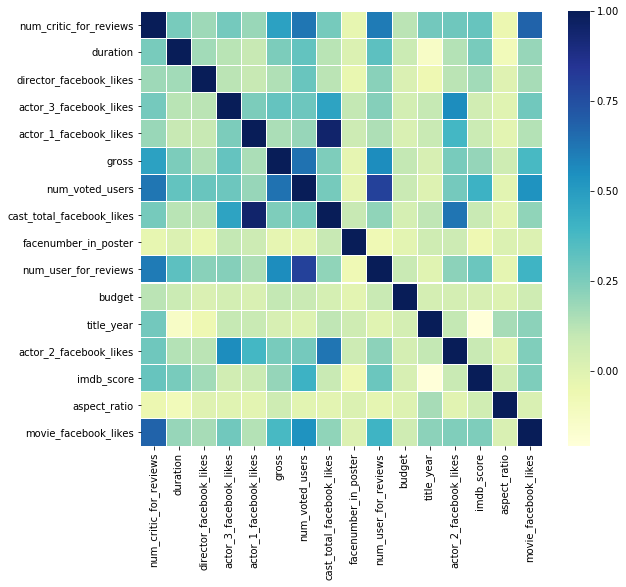

In [10]:
#heat map for correlation values
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(a, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

In [11]:
# Top grossing movie Directors
i=pd.DataFrame(df.groupby('director_name')['gross'].sum())
i.apply(lambda x: x.nlargest(3).index,axis=0)

gross
0  Steven Spielberg
1     Peter Jackson
2       Michael Bay

In [12]:
# Top AVG grossing movie Directors
i=pd.DataFrame(df.groupby('director_name')['gross'].mean())
i.apply(lambda x: x.nlargest(3).index,axis=0)

gross
0  Joss Whedon
1  Lee Unkrich
2   Chris Buck

In [13]:
# Top 3 Rated Genres
f=pd.DataFrame(df.groupby('genres')['imdb_score'].mean())
f.apply(lambda x: x.nlargest(3).index,axis=0)

imdb_score
0  Action|Adventure|Crime|Drama|Sci-Fi|Thriller
1      Action|Adventure|Biography|Drama|History
2             Action|Drama|History|Thriller|War

In [14]:
# Top 3 Grossing movie genres
f=pd.DataFrame(df.groupby('genres')['gross'].mean())
f.apply(lambda x: x.nlargest(3).index,axis=0)

gross
0                                    Family|Sci-Fi
1         Adventure|Animation|Drama|Family|Musical
2  Adventure|Animation|Comedy|Drama|Family|Fantasy

In [15]:
# imdb Dataset
k=df2.corr(method ='pearson')
k.apply(lambda x: x.nlargest(4).index,axis=0)[1:] #top 3 correlation values of each column
# Drama genre movies are getting high rating
# Action,Crime genres are more available on dataset
# A movie with more rating count is getting slightly high imdb rating
# Talkshows are becoming famous now a days

imdbRating       ratingCount         duration              year  \
1     nrOfWins   nrOfUserReviews            Drama       ratingCount   
2        Drama  nrOfNewsArticles  nrOfUserReviews          TalkShow   
3  ratingCount          nrOfWins      ratingCount  nrOfNewsArticles   

          nrOfWins   nrOfNominations        nrOfPhotos nrOfNewsArticles  \
1  nrOfNominations          nrOfWins  nrOfNewsArticles       nrOfPhotos   
2      ratingCount  nrOfNewsArticles   nrOfNominations      ratingCount   
3  nrOfUserReviews        nrOfPhotos       ratingCount  nrOfUserReviews   

    nrOfUserReviews  nrOfGenre  ...      News   RealityTV    Romance  \
1       ratingCount     Action  ...  TalkShow    GameShow  nrOfGenre   
2  nrOfNewsArticles      Crime  ...      year  nrOfPhotos      Drama   
3          nrOfWins  Adventure  ...     Sport        year   duration   

             SciFi        Short      Sport TalkShow         Thriller  \
1           Horror  Documentary   duration    Music           Horror   
2  nrOfUserReviews    Animation  Biography     News          Mystery   
3        nrOfGenre       Family  nrOfGenre     year  nrOfUserReviews   

         War     Western  
1      Drama    duration  
2    History   Adventure  
3  nrOfGenre  imdbRating  

[3 rows x 38 columns]

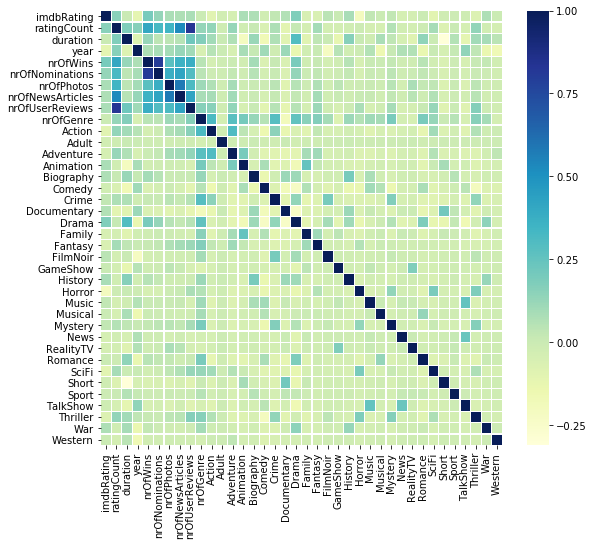

In [16]:
#heat map for correlation values
import seaborn as sns
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(k, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

In [17]:
# highest rated genre is Drama
pd.DataFrame(df2.groupby('Drama')['imdbRating'].mean())

imdbRating
Drama            
0        6.685642
1        7.088028

In [18]:
# More avg wins for Biography genre
pd.DataFrame(df2.groupby('Biography')['nrOfWins'].mean())

nrOfWins
Biography          
0          2.908866
1          7.254457

In [46]:
import warnings
warnings.filterwarnings('ignore')
from subprocess import check_output
genre_list = ['Action', 'Adult', 'Adventure', 'Animation', 'Biography','Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'FilmNoir', 'GameShow', 'History', 'Horror', 'Music', 'Musical','Mystery', 'News', 'RealityTV', 'Romance', 'SciFi', 'Short', 'Sport',
       'TalkShow', 'Thriller', 'War', 'Western']
movie_data = df2[df2['type']=='video.movie']
reces_years = [2007, 2008, 2009, 2003, 2002, 1991, 1990, 1981, 1980,
               1975, 1974, 1973, 1970, 1969, 1961, 1960, 1954, 1953, 
               1949, 1938, 1937, 1930, 1929, 1928]
remains_summed = pd.DataFrame()

# Count for movies with rating in the dataset in a given year
for i in range(1888,2018):
    if i in reces_years:
        continue
    try:
        remains_summed.at[i,'num_movies_with_rating'] = \
        round(movie_data[movie_data['year'] == i]['year'].count())
    except ValueError:
        continue
        
# creating column for average movie rating received for a given year
for i in range(1888,2018):
    if i in reces_years:
        continue
    try:
        remains_summed.at[i,'ave_rating_in_the_year'] = \
        round(movie_data[movie_data['year'] == i]['imdbRating'].mean())
    except ValueError:
        continue

In [49]:
# creating column for average movie rating received for a given year
for i in range(1888,2018):
    if i in reces_years:
        continue
    try:
        remains_summed.at[i,'ave_rating_in_the_year'] = \
        round(movie_data[movie_data['year'] == i]['imdbRating'].mean())
    except ValueError:
        continue

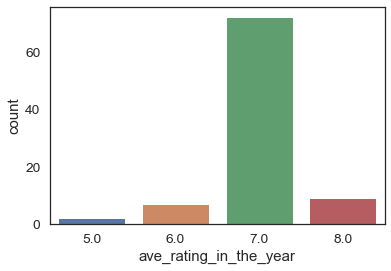

In [50]:
g = sns.countplot(x='ave_rating_in_the_year',data=remains_summed)

In [51]:
all_years = pd.DataFrame()

# Count for number of movies in a given year
for i in range(1888,2018):
    try:
        all_years.at[i,'num_movies_with_rating'] = \
        round(movie_data[movie_data['year'] == i]['year'].count())
    except ValueError:
        continue
 
#Average movie ratings for movies in a given year
for i in range(1888,2018):
    try:
        all_years.at[i,'ave_rating_in_the_year'] = \
        round(movie_data[movie_data['year'] == i]['imdbRating'].mean())
    except ValueError:
        continue

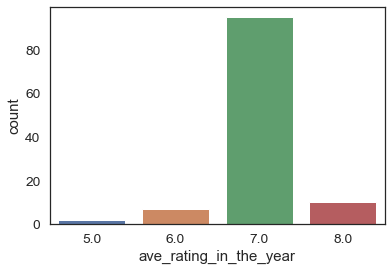

In [52]:
sns.countplot(x='ave_rating_in_the_year',data=all_years)


In [53]:
recession_years = pd.DataFrame()

# creating column with movies with rating for a given year
for i in reces_years:
    try:
        recession_years.at[i,'num_movies_with_rating'] = \
        round(movie_data[movie_data['year'] == i]['year'].count())
    except ValueError:
        continue

# creating column with average rating for the movies in a given year
for i in reces_years:
    try:
        recession_years.at[i,'ave_rating_in_the_year'] = \
        round(movie_data[movie_data['year'] == i]['imdbRating'].mean())
    except ValueError:
        continue

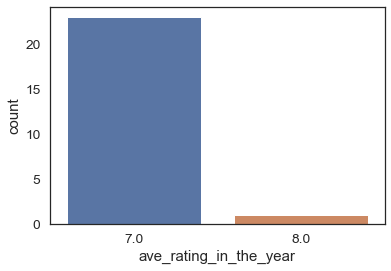

In [54]:
g = sns.countplot(x = 'ave_rating_in_the_year', data= recession_years);